#ANN Model

In [ ]:
import keras;
from keras.models import Sequential;
from keras.layers import Dense;
from keras.layers import Flatten;

#build ANN model
ANN_model = tf.keras.models.Sequential()

ANN_model.add(Dense(128, activation='relu',input_shape=(X_processed.shape[1],)))
ANN_model.add(Flatten())
ANN_model.add(Dense(3, activation='softmax'))

ANN_model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 128)               3840      
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_111 (Dense)           (None, 3)                 387       
                                                                 
Total params: 4227 (16.51 KB)
Trainable params: 4227 (16.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ANN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="SparseCategoricalCrossentropy",metrics=['accuracy'])

In [ ]:
history = ANN_model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs = 10,
                    batch_size = 75)

Epoch 1/10
736/736 [==============================] - 3s 3ms/step - loss: 0.6102 - accuracy: 0.7360 - val_loss: 0.5390 - val_accuracy: 0.7557
Epoch 2/10
736/736 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7596 - val_loss: 0.5200 - val_accuracy: 0.7626
Epoch 3/10
736/736 [==============================] - 1s 2ms/step - loss: 0.5234 - accuracy: 0.7613 - val_loss: 0.5161 - val_accuracy: 0.7634
Epoch 4/10
736/736 [==============================] - 2s 2ms/step - loss: 0.5204 - accuracy: 0.7604 - val_loss: 0.5173 - val_accuracy: 0.7610
Epoch 5/10
736/736 [==============================] - 1s 2ms/step - loss: 0.5187 - accuracy: 0.7612 - val_loss: 0.5128 - val_accuracy: 0.7623
Epoch 6/10
736/736 [==============================] - 2s 2ms/step - loss: 0.5175 - accuracy: 0.7605 - val_loss: 0.5122 - val_accuracy: 0.7618
Epoch 7/10
736/736 [==============================] - 2s 3ms/step - loss: 0.5160 - accuracy: 0.7617 - val_loss: 0.5116 - val_accuracy: 0.7619
Epoch 

In [ ]:
ANN_model.save('ANN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('ANN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ANN_model.evaluate(X_test, y_test)

192/192 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7631


[0.510551393032074, 0.7630849480628967]

192/192 [==============================] - 0s 1ms/step


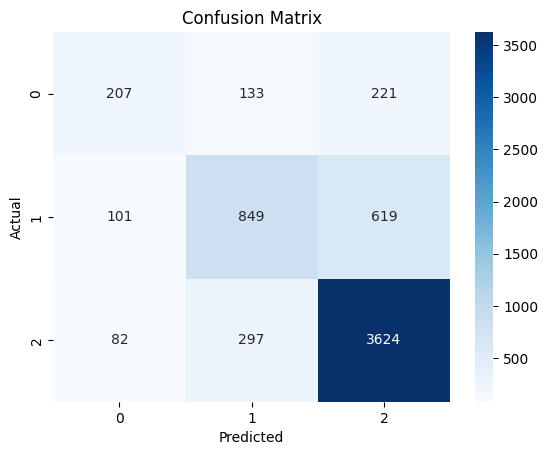

In [ ]:
#hard = 0 , med = 1 , soft = 2
# Make predictions on the validation set
y_val_pred_prob = ANN_model.predict(X_test)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_val_pred)

# Plot the confusion matrix using seaborn
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()